In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [2]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 12, 31)

symbol=['TSM','MSFT','AAPL','INTC','ORCL','NVDA','IBM']



# Экспорт с Yahoo
data_exchange={}
for s in symbol:
    data_exchange[s] =  web.DataReader(s,'yahoo', start, end) 
data_exchange

# Экспорт с Google
#data_exchange={}
#for s in symbol:
#    data_exchange[s] =  web.DataReader(s,'google',start,end) 
#data_exchange


{'TSM':                  High        Low       Open      Close     Volume  Adj Close
 Date                                                                        
 2017-01-03  29.510000  29.059999  29.250000  29.309999  6280300.0  26.332617
 2017-01-04  29.459999  29.200001  29.389999  29.299999  4391800.0  26.323633
 2017-01-05  29.910000  29.520000  29.530001  29.799999  4775700.0  26.772842
 2017-01-06  29.850000  29.459999  29.740000  29.629999  4878700.0  26.620110
 2017-01-09  30.139999  29.719999  29.790001  30.040001  8371700.0  26.988464
 ...               ...        ...        ...        ...        ...        ...
 2017-12-22  39.630001  39.299999  39.599998  39.630001  2523600.0  36.764702
 2017-12-26  39.310001  38.810001  39.310001  38.950001  2861500.0  36.133869
 2017-12-27  39.110001  38.880001  39.000000  39.080002  3092900.0  36.254471
 2017-12-28  39.889999  39.400002  39.509998  39.740002  4279500.0  36.866753
 2017-12-29  40.220001  39.650002  39.849998  39.650002  

In [3]:
data_exchange['TSM'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.510000,29.059999,29.250000,29.309999,6280300.0,26.332617
2017-01-04,29.459999,29.200001,29.389999,29.299999,4391800.0,26.323633
2017-01-05,29.910000,29.520000,29.530001,29.799999,4775700.0,26.772842
2017-01-06,29.850000,29.459999,29.740000,29.629999,4878700.0,26.620110
2017-01-09,30.139999,29.719999,29.790001,30.040001,8371700.0,26.988464


In [4]:
def pivot_tikers(dict_df,col):
    item=[]
    tikers=[]
    for tiker in data_exchange.keys():
        data=dict_df[tiker][col]
        item.append(data)
        tikers.append(tiker)
    combine=pd.concat(item, axis=1) 
    combine.columns=tikers
    return combine
    

In [5]:
stoks_open=pivot_tikers(data_exchange,'Open')
stoks_open.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,29.250000,62.790001,115.800003,36.610001,38.450001,104.400002,167.000000
2017-01-04,29.389999,62.480000,115.849998,36.709999,38.549999,103.400002,167.770004
2017-01-05,29.530001,62.189999,115.919998,36.450001,38.669998,104.529999,169.250000
2017-01-06,29.740000,62.299999,116.779999,36.590000,38.750000,102.849998,168.690002
2017-01-09,29.790001,62.759998,117.949997,36.480000,38.529999,103.500000,169.470001


In [6]:
stoks_close=pivot_tikers(data_exchange,'Close')
stoks_close.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,29.309999,62.580002,116.150002,36.599998,38.549999,102.010002,167.190002
2017-01-04,29.299999,62.299999,116.019997,36.410000,38.740002,104.389999,169.259995
2017-01-05,29.799999,62.299999,116.610001,36.349998,38.639999,101.739998,168.699997
2017-01-06,29.629999,62.840000,117.910004,36.480000,38.450001,103.099998,169.529999
2017-01-09,30.040001,62.639999,118.989998,36.610001,39.029999,107.279999,167.649994


In [7]:
stoks_volume=pivot_tikers(data_exchange,'Volume')
stoks_volume.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,6280300.0,20694100.0,28781900.0,20196500.0,11051300.0,37549900.0,2934300.0
2017-01-04,4391800.0,21340000.0,21118100.0,15915700.0,9545500.0,29980500.0,3381400.0
2017-01-05,4775700.0,24876000.0,22193600.0,13986000.0,12064700.0,24607400.0,2682300.0
2017-01-06,4878700.0,19922900.0,31751900.0,15114000.0,14829700.0,20571400.0,2945500.0
2017-01-09,8371700.0,20382700.0,33561900.0,19461400.0,15587900.0,22906200.0,3189900.0


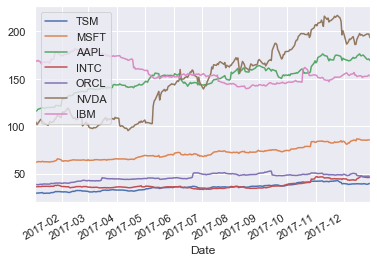

In [8]:
sns.set()
stoks_close.plot()

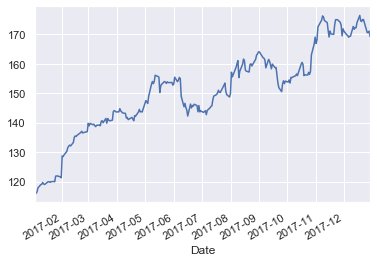

In [9]:
stoks_close['AAPL'].plot()

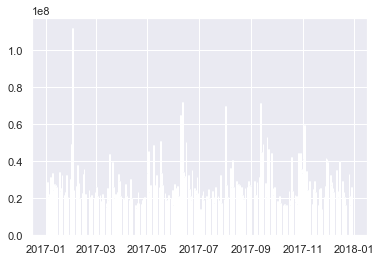

In [10]:
plt.bar(stoks_volume['AAPL'].index,stoks_volume['AAPL'].values);

In [11]:
# Здесь разбираемся сами и совмещаем два графика



### Вычисляем ежедневное процентное закрытие
$$ r_t =\dfrac{p_t}{p_{t-1}}-1 $$

In [12]:
daily_pct_na=(stoks_close/stoks_close.shift(1)-1)
daily_pct_na.head()

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.000341,-0.004474,-0.001119,-0.005191,0.004929,0.023331,0.012381
2017-01-05,0.017065,0.000000,0.005085,-0.001648,-0.002581,-0.025386,-0.003309
2017-01-06,-0.005705,0.008668,0.011148,0.003576,-0.004917,0.013367,0.004920
2017-01-09,0.013837,-0.003183,0.009159,0.003564,0.015084,0.040543,-0.011090


In [13]:
#тут внимательнее с данными
daily_pct_0=(stoks_close/stoks_close.shift(1)-1).fillna(0)
daily_pct_0.head()

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.000341,-0.004474,-0.001119,-0.005191,0.004929,0.023331,0.012381
2017-01-05,0.017065,0.000000,0.005085,-0.001648,-0.002581,-0.025386,-0.003309
2017-01-06,-0.005705,0.008668,0.011148,0.003576,-0.004917,0.013367,0.004920
2017-01-09,0.013837,-0.003183,0.009159,0.003564,0.015084,0.040543,-0.011090


### Вычисляем кумулятивную процентную доходность
$$ i_0=r_0=0 $$
$$ i_t=(i_{t-1}+r_t)100 $$

In [14]:
daily_sum_na=(daily_pct_na*100).cumsum()
daily_sum_na.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.034119,-0.447431,-0.111928,-0.519122,0.492873,2.333102,1.238108
2017-01-05,1.672366,-0.447431,0.396608,-0.683916,0.234736,-0.205457,0.907257
2017-01-06,1.101896,0.419344,1.511438,-0.326279,-0.256979,1.131284,1.399256
2017-01-09,2.485634,0.101074,2.427386,0.030084,1.251468,5.185601,0.290305


In [15]:
daily_sum_0=(daily_pct_0*100).cumsum()  #на сколько вырастет
daily_sum_0.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.034119,-0.447431,-0.111928,-0.519122,0.492873,2.333102,1.238108
2017-01-05,1.672366,-0.447431,0.396608,-0.683916,0.234736,-0.205457,0.907257
2017-01-06,1.101896,0.419344,1.511438,-0.326279,-0.256979,1.131284,1.399256
2017-01-09,2.485634,0.101074,2.427386,0.030084,1.251468,5.185601,0.290305


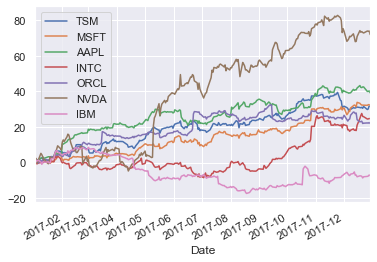

In [16]:
daily_sum_0.plot()

### Вычисляем накопленную процентную доходность
$$ i_0 = 1 $$
$$ i_t = (1+r_t) i_{t-1} $$

In [17]:
daily_prod_na=(1+daily_pct_na).cumprod()  #во сколькьо раз вырастет
daily_prod_na.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.999659,0.995526,0.998881,0.994809,1.004929,1.023331,1.012381
2017-01-05,1.016718,0.995526,1.003960,0.993169,1.002335,0.997353,1.009032
2017-01-06,1.010918,1.004155,1.015153,0.996721,0.997406,1.010685,1.013996
2017-01-09,1.024906,1.000959,1.024451,1.000273,1.012451,1.051662,1.002751


In [18]:
daily_prod_0=(1+daily_pct_0).cumprod()
daily_prod_0.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-04,0.999659,0.995526,0.998881,0.994809,1.004929,1.023331,1.012381
2017-01-05,1.016718,0.995526,1.003960,0.993169,1.002335,0.997353,1.009032
2017-01-06,1.010918,1.004155,1.015153,0.996721,0.997406,1.010685,1.013996
2017-01-09,1.024906,1.000959,1.024451,1.000273,1.012451,1.051662,1.002751


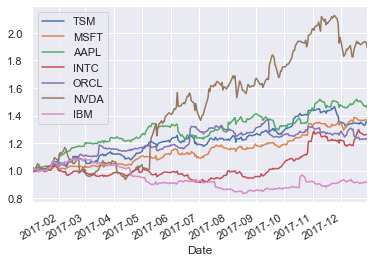

In [19]:
daily_prod_0.plot()

In [20]:
daily_prod_0.asfreq(freq='M')

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-31,1.054589,1.033078,1.044770,1.006011,1.040467,1.070287,1.043842
2017-02-28,1.073695,1.022371,1.179423,0.989071,1.104799,0.994804,1.075543
2017-03-31,1.120437,1.052413,1.236849,0.985519,1.157198,1.067836,1.041569
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,1.206414,1.116011,1.315196,0.986612,1.177432,1.415057,0.912913
2017-06-30,1.192767,1.101470,1.239948,0.921858,1.300649,1.417116,0.920091
2017-07-31,1.226885,1.161713,1.280499,0.969126,1.295201,1.593079,0.865303
2017-08-31,1.261344,1.194791,1.411967,0.958197,1.305577,1.661014,0.855494
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
month_sum_q=daily_sum_0.asfreq(freq='BM')
month_sum_q

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-31,5.437216,3.315269,4.410636,0.678050,4.015276,7.112986,4.410405
2017-02-28,7.362693,2.310309,16.741129,-0.947956,10.066970,0.726829,7.443513
2017-03-31,11.751774,5.254736,21.569616,-1.250677,14.911368,8.124693,4.275719
2017-04-28,12.504191,9.165938,21.594048,-0.932052,15.714759,4.235805,-3.862544
2017-05-31,19.294668,11.252718,27.905313,-0.972884,16.719185,38.902818,-8.669434
2017-06-30,18.332926,10.087455,22.238215,-7.655950,27.072538,39.907648,-7.850531
2017-07-31,21.215049,15.489499,25.518510,-2.560401,26.713570,52.097874,-13.866096
2017-08-31,24.123247,18.382308,35.564177,-3.608890,27.585552,57.014717,-14.964877
2017-09-29,25.765711,18.063476,29.462126,4.697241,23.923101,62.948519,-13.502980


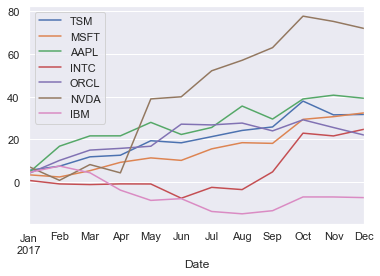

In [22]:
month_sum_q.plot()

In [23]:
# ВНИМАНИЕ не ОШИБИСЬ С ОПЕРАТОРОМ почему тут стоит first, а не sum, last или prod
# Что значит "MS" 
# ВНИМАНИЕ почему такой код лучше предидушего?

month_sum=daily_sum_0.resample('MS').first()  #первый день месяца
month_sum

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-01,5.987200,1.660204,10.508701,-0.136722,3.342126,11.481915,4.278609
2017-03-01,7.712235,3.810782,18.785065,-1.693813,10.841795,2.017721,8.628025
2017-04-01,11.904025,4.784044,21.597454,-1.001161,14.911368,7.619779,4.482449
2017-05-01,13.502080,10.553616,23.633733,-0.489452,15.914937,6.479330,-4.767152
2017-06-01,20.793533,11.625001,28.180253,-0.945196,17.600440,38.909742,-8.643231
2017-07-01,18.104099,8.984884,21.877151,-8.485833,25.516896,36.289776,-6.712912
2017-08-01,20.881348,15.324443,26.406029,-0.079439,27.174214,53.316267,-13.430619
2017-09-01,24.799471,17.272244,35.594667,-3.551860,28.161744,57.616703,-14.230763


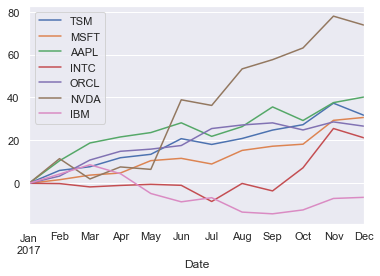

In [24]:
month_sum.plot()

In [25]:
month_prod=daily_prod_0.resample('MS').first()
month_prod

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2017-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-02-01,1.060389,1.015980,1.108480,0.997814,1.033463,1.117047,1.042467
2017-03-01,1.077448,1.037712,1.203530,0.981694,1.113359,1.007646,1.088283
2017-04-01,1.122143,1.047459,1.237193,0.987978,1.157198,1.062445,1.043723
2017-05-01,1.139543,1.109140,1.261989,0.992077,1.168612,1.045388,0.950057
2017-06-01,1.224497,1.120166,1.318812,0.986885,1.187808,1.415155,0.913153
2017-07-01,1.190038,1.089326,1.235471,0.914208,1.280415,1.365846,0.930558
2017-08-01,1.222791,1.159795,1.291864,0.993169,1.301167,1.612489,0.869071
2017-09-01,1.269874,1.181528,1.412398,0.958743,1.313100,1.671013,0.861774


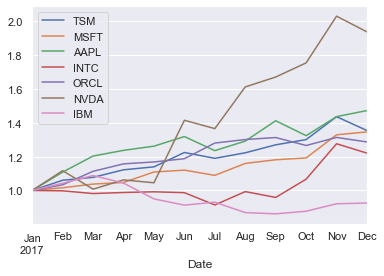

In [26]:
month_prod.plot()

### Скользящее среднее

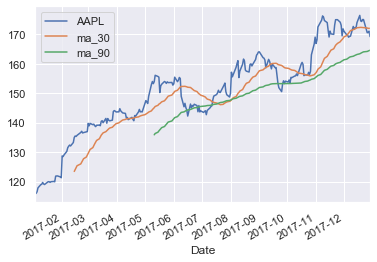

In [27]:
aapl_close=stoks_close['AAPL']
ma_30=aapl_close.rolling(30).mean()
ma_90=aapl_close.rolling(90).mean()
result=pd.concat([aapl_close,ma_30,ma_90],axis=1)
result.columns=['AAPL','ma_30','ma_90']
result.plot()

In [28]:
aapl_close=daily_sum_0['AAPL']
msft_close=daily_sum_0['MSFT']

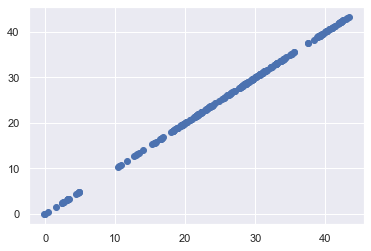

In [29]:
plt.scatter(aapl_close,aapl_close)

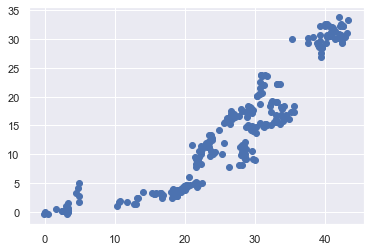

In [30]:
plt.scatter(aapl_close,msft_close)

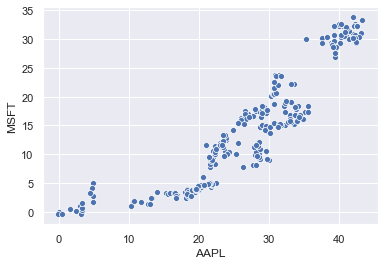

In [31]:
df=pd.concat([aapl_close,msft_close],axis=1)
sns.scatterplot(x="AAPL", y="MSFT",data=df)

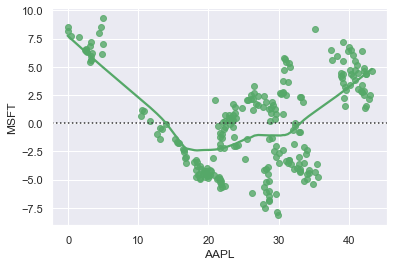

In [32]:
sns.residplot(aapl_close, msft_close, lowess=True, color="g")

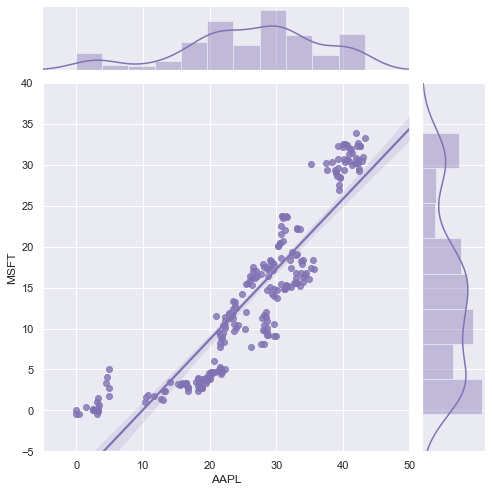

In [33]:
sns.jointplot("AAPL", "MSFT", data=df, kind="reg", xlim=(-5,50), ylim=(-5,40), color="m", height=7)

### Волатильность

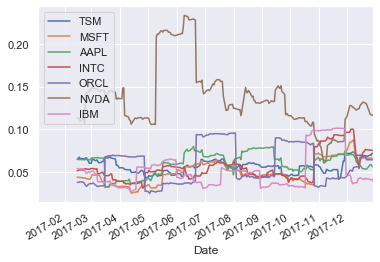

In [34]:
per=30

vol=daily_pct_0.rolling(per).std()*np.sqrt(per)
vol.plot()

### Оценикм риск

In [35]:
df_risk=pd.concat([daily_pct_0.mean(),daily_pct_0.std()],axis=1)
df_risk.columns=["mean",'std']
df_risk

,mean,std
TSM,0.001260,0.010507
MSFT,0.001289,0.009313
AAPL,0.001562,0.011135
INTC,0.000982,0.010774
ORCL,0.000876,0.011193
NVDA,0.002867,0.025262
IBM,-0.000294,0.009963


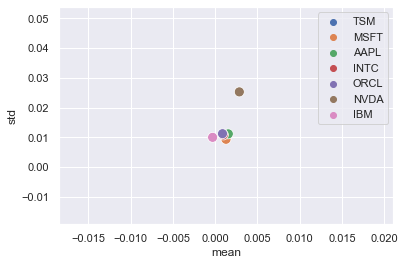

In [36]:
sns.scatterplot(x="mean", y="std", hue=df_risk.index, s=100 ,data=df_risk);

### Взаимная корреляция

напомним про клику и диверсификацию портфеля

In [37]:
corr=daily_pct_0.corr()
corr

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
TSM,1.000000,0.419244,0.499103,0.330240,0.258090,0.301945,0.064257
MSFT,0.419244,1.000000,0.438367,0.490935,0.267813,0.334995,0.062886
AAPL,0.499103,0.438367,1.000000,0.341441,0.123437,0.351767,-0.020903
INTC,0.330240,0.490935,0.341441,1.000000,0.122899,0.262919,0.163278
ORCL,0.258090,0.267813,0.123437,0.122899,1.000000,0.080564,0.203617
NVDA,0.301945,0.334995,0.351767,0.262919,0.080564,1.000000,0.016966
IBM,0.064257,0.062886,-0.020903,0.163278,0.203617,0.016966,1.000000


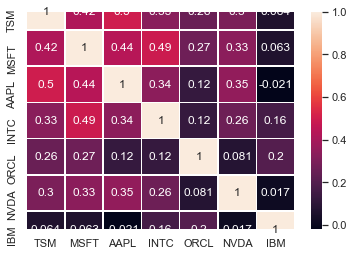

In [38]:
sns.heatmap(corr, annot=True, linewidths=.5);